Logistic Regression

In [ ]:
import numpy as np 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

X = np.random.rand(100, 3) 
y = np.random.randint(0, 2, 100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 
model = LogisticRegression() 
model.fit(X_train, y_train) 
pred = model.predict(X_test) 
print(accuracy_score(y_test, pred))


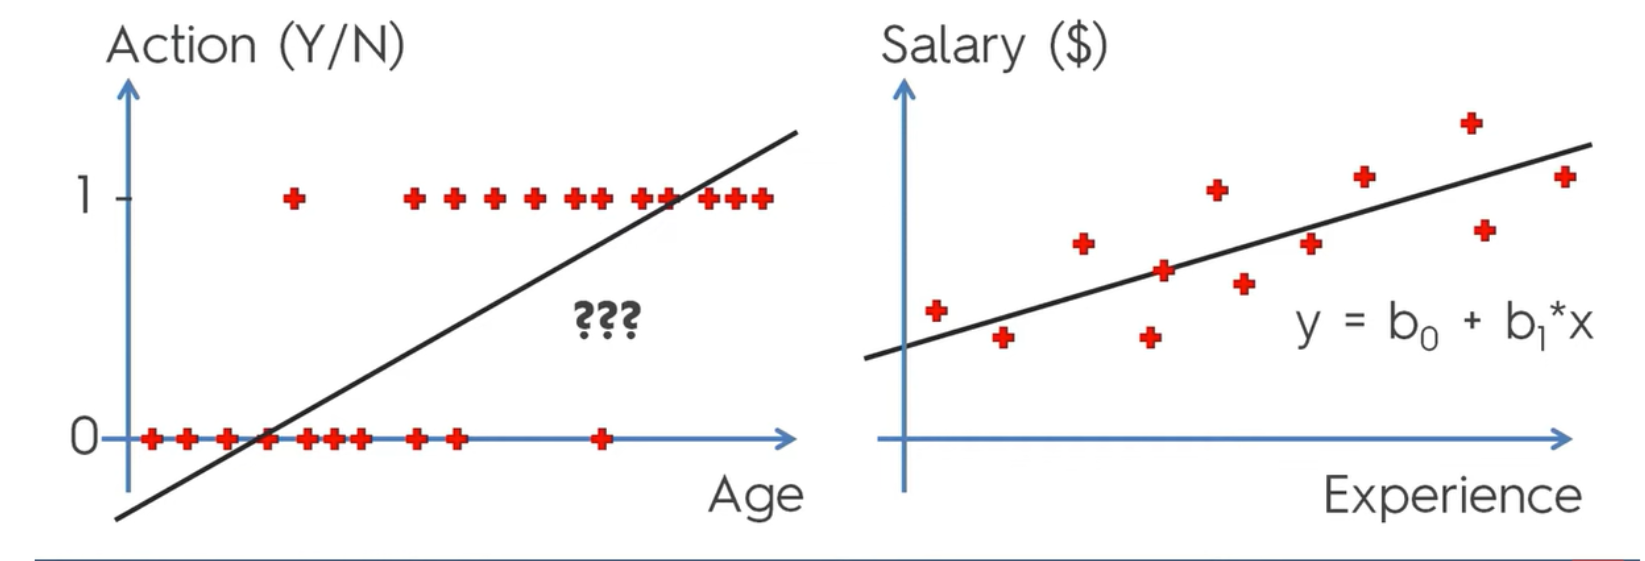

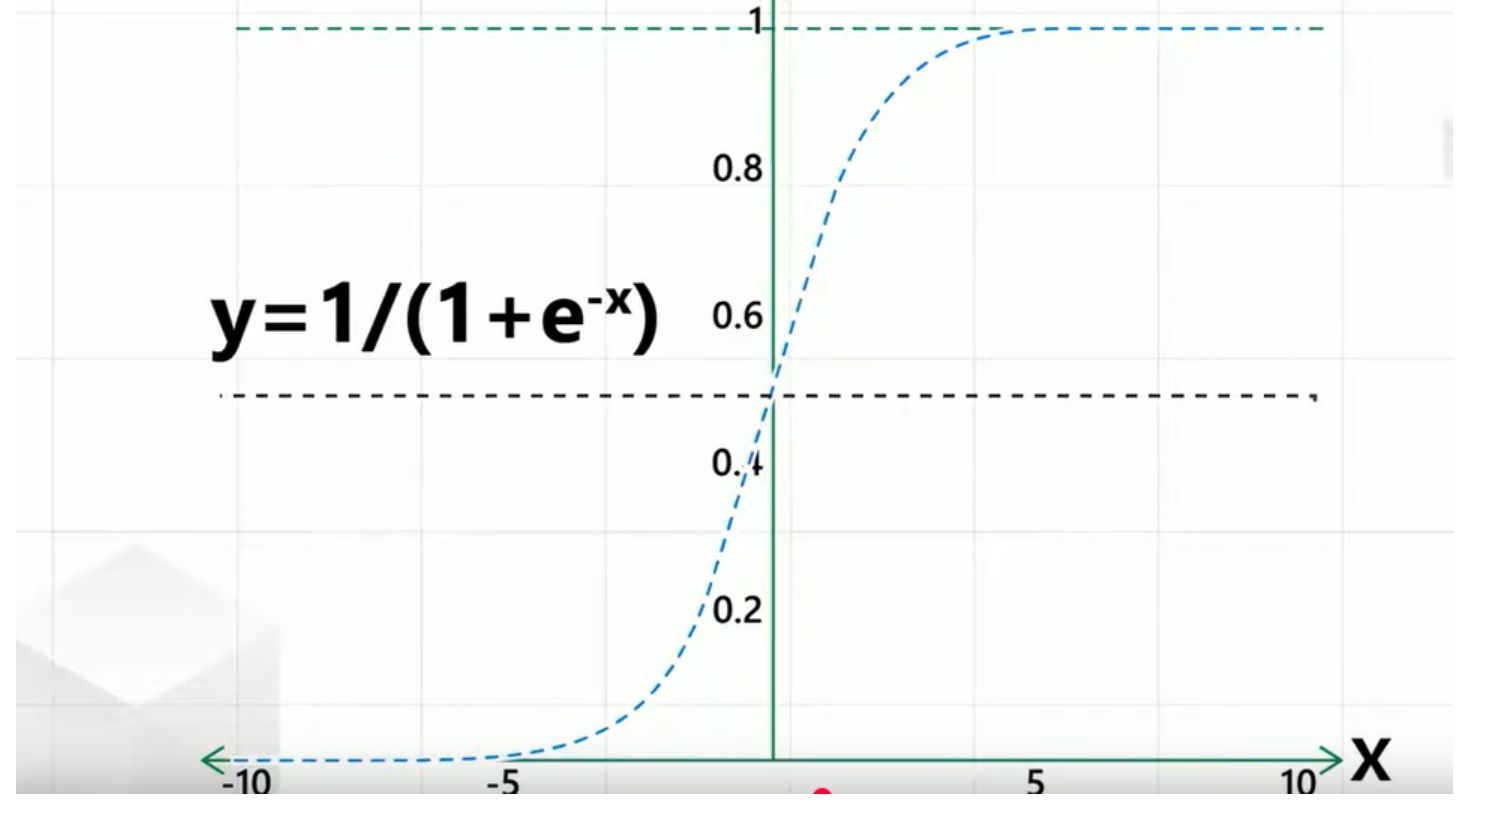

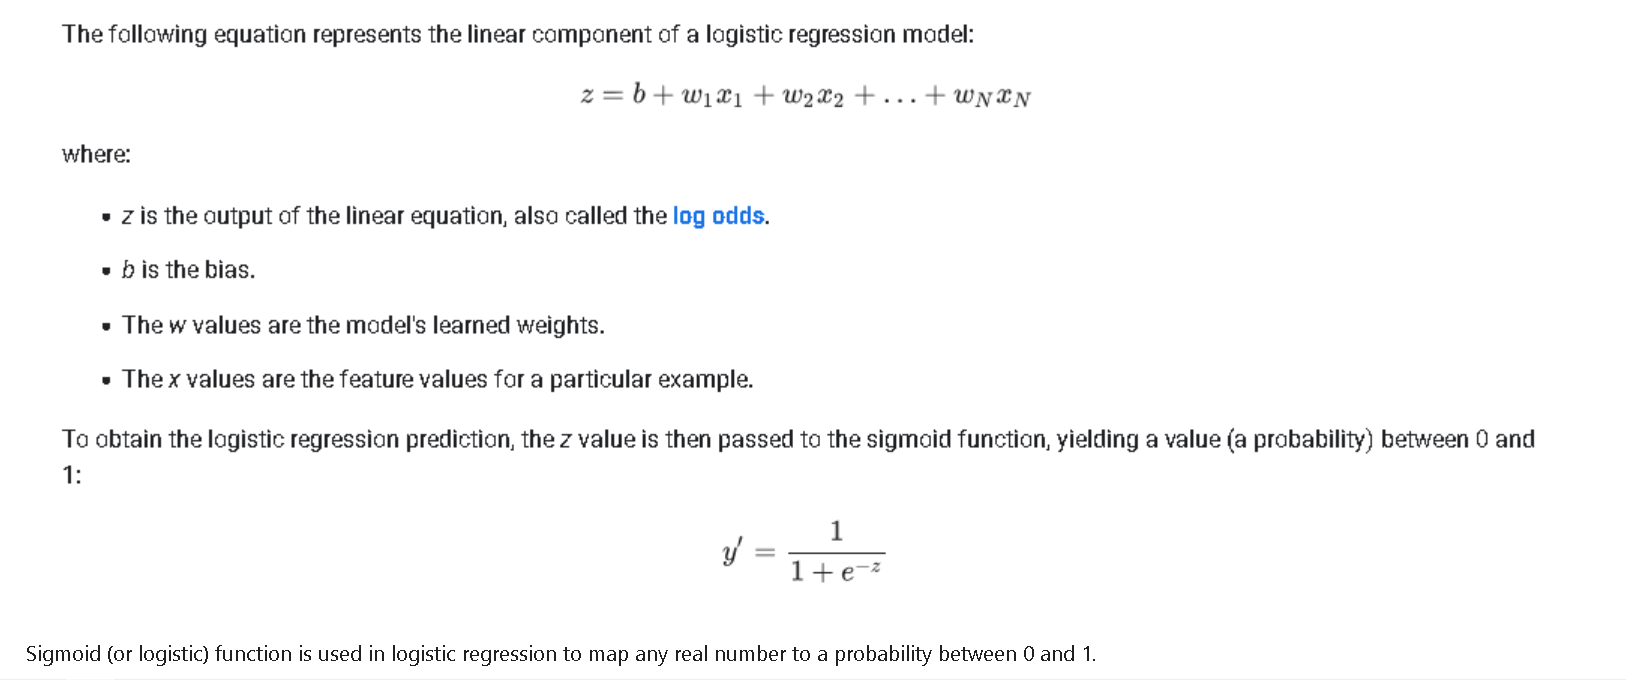

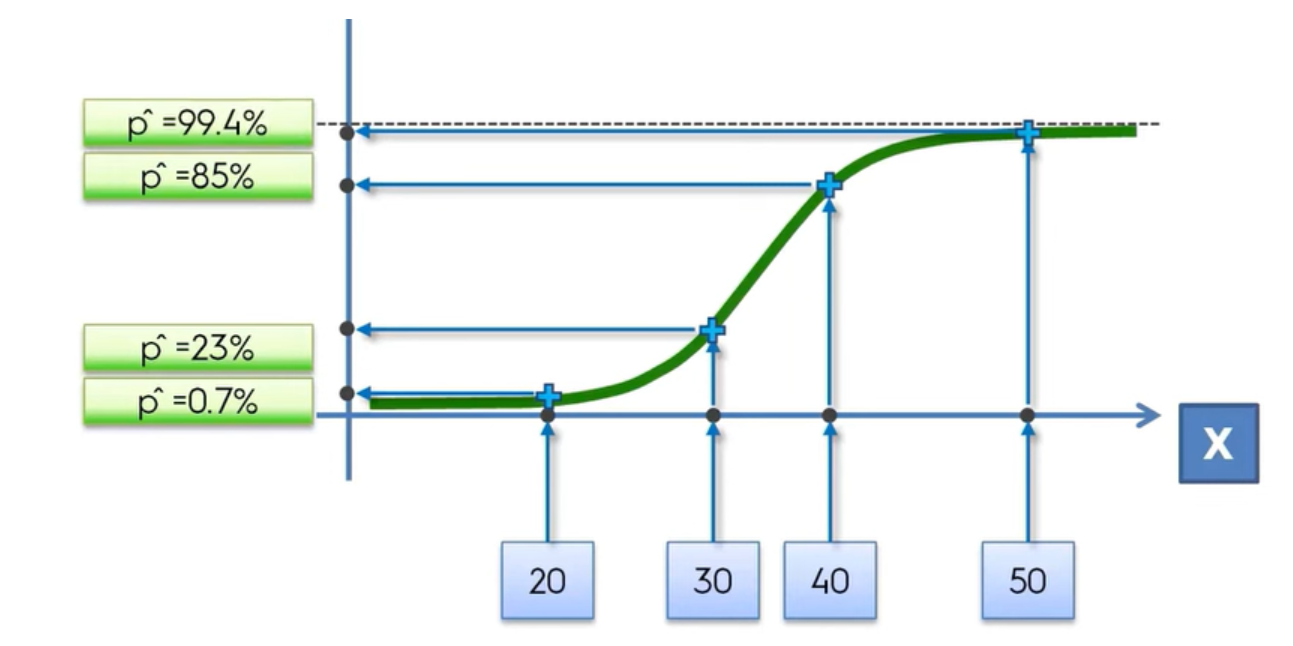

# Loss function (numeric: mean square error (MSE), calssifcation:Log Loss (or Logarithmic Loss, also called Cross-Entropy Loss))

# Bias-Variance Tradeoff, Overfitting, Underfitting

# Regularization: L1 (Lasso Regression), L2 (Ridge regression), Elacticnet, None
# Dropout (ANN), early stopping

model = LogisticRegression( multi_class='multinomial', # use softmax solver='lbfgs', # supports multinomial max_iter=200 )

solver Optimization algorithm "lbfgs" or "saga" (supports multinomial)

Class vs Function

In [1]:
def add(a, b):
    return a + b

result = add(3, 5)
print(result)  

8


In [3]:
class Calculator:
    def __init__(self):
        self.total = 0

    def add(self, a, b):
        return a + b

calc = Calculator()
print(calc.add(3, 5))

8


In [7]:
class Calculator:
    def __init__(self):
        self.total = 0  

    def add(self, a, b):
       
        return a + b

    def multiply(self, a, b):
        
        return a * b



calc = Calculator()


sum_result = calc.add(3, 5)
product_result = calc.multiply(3, 5)

# Display results
print("Addition:", sum_result)        
print("Multiplication:", product_result)

Addition: 8
Multiplication: 15


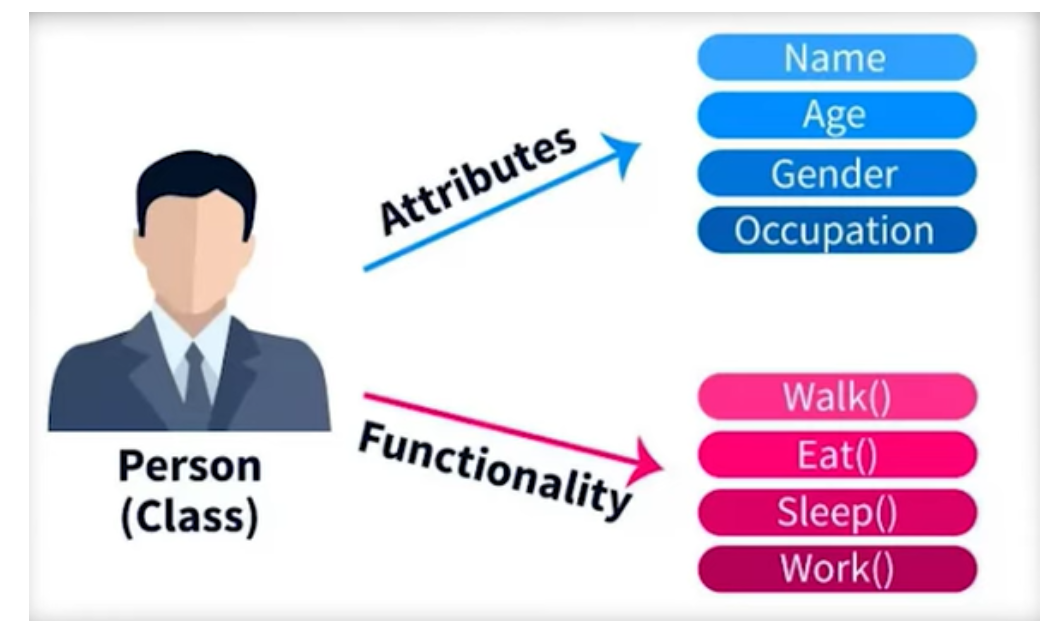

In [2]:
class Ensan:
    name = 'name'
    age = 0

    def morefi(self):
        print(f"Sallam, man {self.name} Hastam")

In [3]:
Ali = Ensan()


In [4]:
Ali.name= 'ali'
Ali.age = 20

In [5]:
Ali.morefi()

Sallam, man ali Hastam


In [10]:
class Pet: 
    def __init__(self, name, age, type):
        self.name = name 
        self.age = age 
        self.type = type

    def eat(self, food):
        print(f'{self.name} is eating {food}')
      
       

In [14]:
my_dog = Pet("'Pishi", 4, 'Cat')
my_dog.eat('meat')

'Pishi is eating meat


LLM, NLP
Text → Numeric Data (Vectorization)
Computers can’t directly understand text — they only understand numbers.
So first, we convert text (emails, sentences, etc.) into numerical vectors.


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Sample emails
emails = [
    "Win money now!!! Free offer limited time",
    "Hi John, let's have a meeting tomorrow",
    "Cheap meds available, click now!",
    "Project report due next week"
]
labels = ["spam", "real", "spam", "real"]

# Step 1: Convert text → numeric data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(emails)

# Step 2: Train model
model = MultinomialNB()
model.fit(X, labels)

# Step 3: Predict
new_email = ["Free vacation offer just for you"]
X_new = vectorizer.transform(new_email)
print(model.predict(X_new))

['spam']


Sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='deprecated', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

Important compnoets:

penalty{‘l1’, ‘l2’, ‘elasticnet’, None}, default=’l2’

C float, default=1.0, must be a positive float, smaller values specify stronger regularization.

solver: solver is the algorithm responsible for finding the optimal model parameters (weights and bias) that minimize the cost function — typically the log-loss (cross-entropy loss).{‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’}, default=’lbfgs’. For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;

max_iterint, default=100 Maximum number of iterations taken for the solvers to converge.

cv = Cross validation -->5


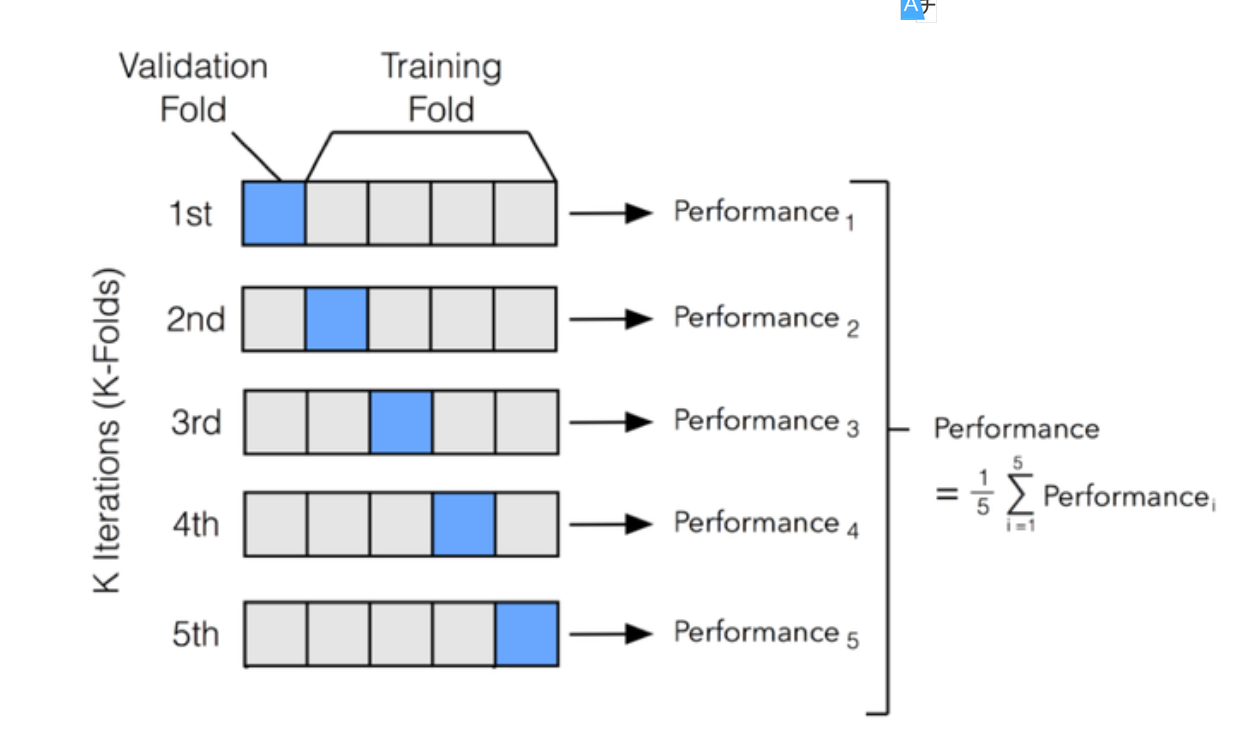

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

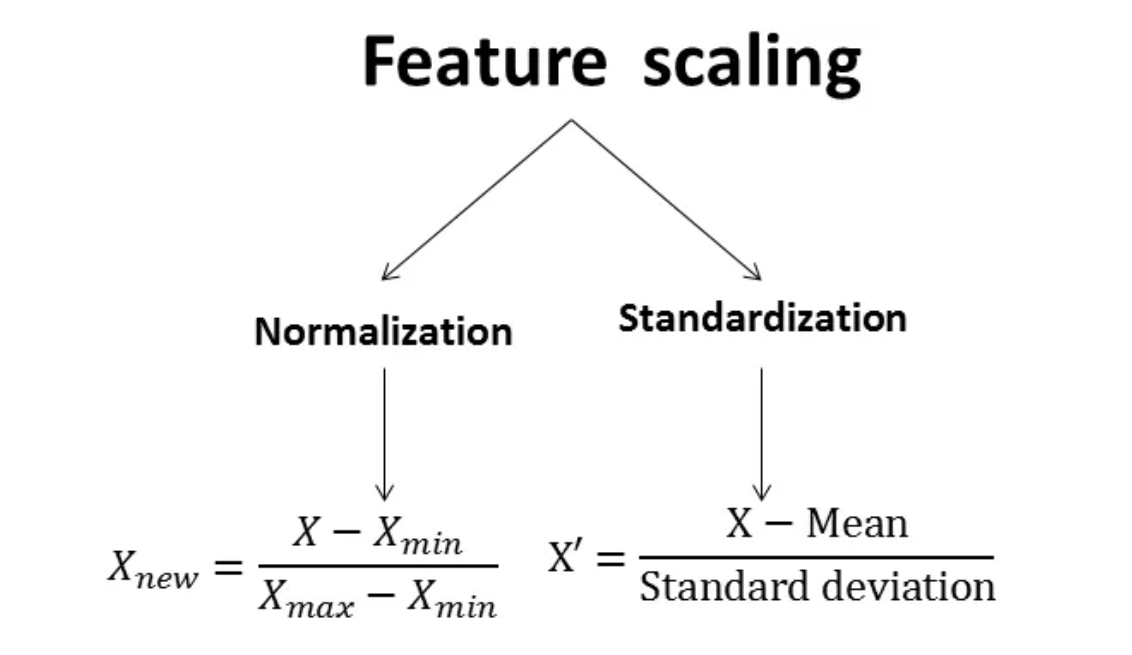

In [18]:
def generate_soil_data(n_samples=200, random_state=42):
    np.random.seed(random_state)
    
    # Features
    # np.random.normal(6.5, 0.7, n_samples)
    # np.clip(..., 4, 8)
    
    pH = np.clip(np.random.normal(6.5, 0.7, n_samples), 4, 8)
    organic_matter = np.clip(np.random.normal(3.5, 1.0, n_samples), 0.5, 6)
    nitrogen = np.clip(np.random.normal(50, 15, n_samples), 10, 100)
    phosphorus = np.clip(np.random.normal(25, 10, n_samples), 5, 60)
    potassium = np.clip(np.random.normal(150, 50, n_samples), 50, 300)
    
    # Target variable (Fertile vs Poor)
    soil_quality = []
    for i in range(n_samples):
        if pH[i] >= 6.0 and organic_matter[i] >= 3.0 and nitrogen[i] >= 40:
            soil_quality.append(1)  # Fertile
        else:
            soil_quality.append(0)  # Poor
    
    df = pd.DataFrame({
        "pH": np.round(pH, 2),  # round teh array pH data and 2 means two decimals
        "organic_matter": np.round(organic_matter, 2),
        "nitrogen": np.round(nitrogen, 1),
        "phosphorus": np.round(phosphorus, 1),
        "potassium": np.round(potassium, 1),
        "soil_quality": soil_quality
    })
    
    return df

In [16]:
n_samples = 5

for i in range(n_samples):
    print(i)

0
1
2
3
4


In [17]:
n_samples = 5
values = []

for i in range(n_samples):
    values.append(i)

print(values)

[0, 1, 2, 3, 4]


In [21]:
soil_df = generate_soil_data()
print("Sample soil data:")
print(soil_df.head())

Sample soil data:
     pH  organic_matter  nitrogen  phosphorus  potassium  soil_quality
0  6.85            3.86      26.1        32.6      196.9             0
1  6.40            4.06      41.0        15.8      124.2             1
2  6.95            4.58      50.1        33.7      154.8             1
3  7.57            4.55      50.7        38.6      126.9             1
4  6.34            2.12      43.2        29.1      128.3             0


In [22]:
X = soil_df[["pH", "organic_matter", "nitrogen", "phosphorus", "potassium"]]
# X = soil_df.drop(columns=["soil_quality"])
y = soil_df["soil_quality"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [27]:
y_pred = model.predict(X_test_scaled)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8

Confusion Matrix:
 [[19  2]
 [ 6 13]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.90      0.83        21
           1       0.87      0.68      0.76        19

    accuracy                           0.80        40
   macro avg       0.81      0.79      0.80        40
weighted avg       0.81      0.80      0.80        40



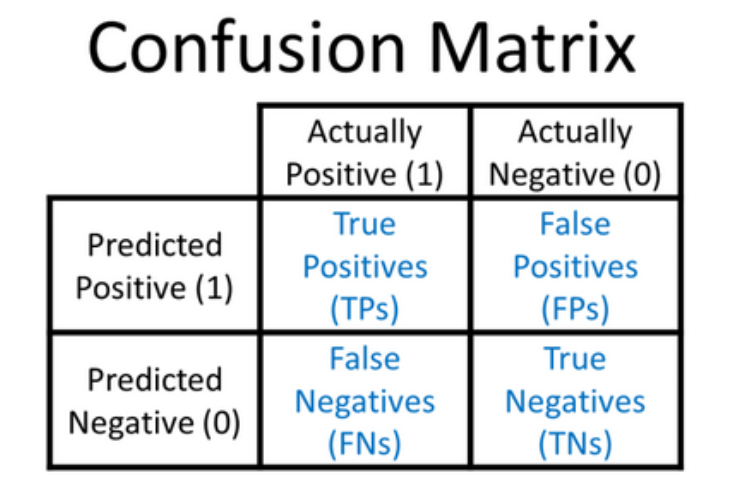

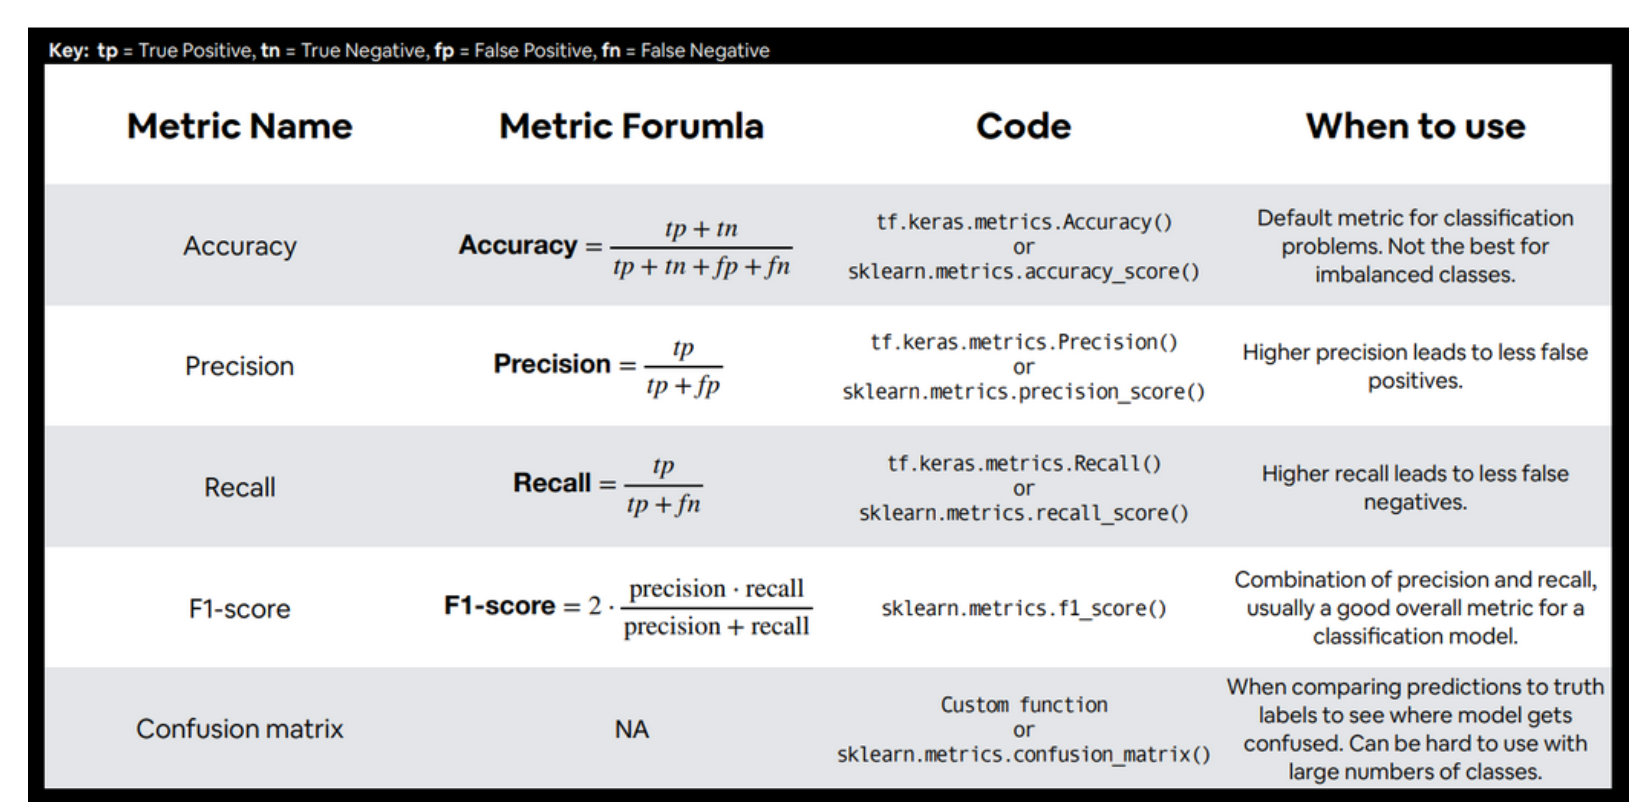